In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import BarycentricInterpolator
%matplotlib inline

1)Принимаем на вход массив с координатами узлов $[x_{0}, ... , x_{n}]$ и массив значений функции $f$ в этих узлах.  
Строим Чебышевскую сетку. Корни многочлена Чебышева: $t_{nj} = \cos{(\frac{\pi}{2n} + \frac{\pi}{n}j)}$  
Для получения узлов Чебышева на произвольном отрезке $[x_{0},x_{n}]$ можно применить аффинное преобразование отрезков: $\frac{1}{2}(x_{0} + x_{n}) + \frac{1}{2}(x_{n} - x_{0})\cdot \cos{(\frac{\pi}{2n} + \frac{\pi}{n}j)}, j = \overline{0,n-1}$

In [51]:
n_Newton = 7
n_Cheb = 7
points = np.array([-2.0,-1.0,-0.5,0,0.2,1.5,2.0])
#f_x = lambda xi: -1.0/np.exp(xi**2 + 1)
f_x = lambda xi:np.sin(xi) * np.exp(xi + 1)
#df_x = lambda xi: (2*xi)/np.exp(xi**2 + 1)
df_x = lambda xi:np.exp(xi+1)*(np.sin(xi)+np.cos(xi))
f = np.array([f_x(points[i]) for i in range(len(points))])
print(f)
j = np.arange(n_Cheb)
tn = np.linspace(points[0],points[n_Newton - 1],7)
#tn = np.cos(np.pi/(2*n_Cheb) + np.pi * j / n_Cheb)
print(tn)
#tn = 0.5 *(points[0] + points[n_Newton - 1]) + 0.5 *(points[n_Newton - 1] - points[0])*tn
print(tn)

[-0.33451183 -0.84147098 -0.79043908  0.          0.65960541 12.15197665
 18.26372704]
[-2.         -1.33333333 -0.66666667  0.          0.66666667  1.33333333
  2.        ]
[-2.         -1.33333333 -0.66666667  0.          0.66666667  1.33333333
  2.        ]


2)Эти функции вычисляют: а)таблицу разделенных разностей $$
\displaystyle f(x_0;\ldots;x_k) = \sum_{j=0}^{k} \frac{f(x_j)}{\displaystyle \prod_{\substack{l=0 \\ l \ne j}}^k (x_j - x_l)}$$.  
$L_n(x) = f(x_0) + f(x_0; x_1) (x - x_0) + f(x_0;x_1;x_2)(x-x_0)(x-x_1) + \ldots + f(x_0;x_1;\ldots;x_n) (x-x_0) \ldots (x - x_{n-1})$    
б)Значение полинома Ньютона $L_{n}(x)$ в точке x зa $O(n)$   
$L'_n(x) = f(x_0; x_1) + f(x_0;x_1;x_2)(x-x_0 + x-x_1) + f(x_0;x_1;x_2;x_3)((x-x_0)(x-x_{1}) + (x-x_0)(x-x_{2}) + (x-x_2)(x-x_{1})) + \ldots $   
в)Значение полинома продифференцированного полинома Ньютона $L'_{n}(x)$ в точке x зa $O(n)$

In [41]:
def new_poly_coeff(x,y):
    n = len(x)
    x = np.copy(x)
    #a = np.copy(y)
    #for k in range(1,n):
        #a[k:n] = (a[k:n] - a[k-1])/(x[k:n] - x[k-1])
    #print(a)
    F = np.zeros((n,n), dtype=float) 
    b = np.zeros(n) 
    for i in range(0,n): 
        F[i,0]=y[i] 
    for j in range(1, n): 
        for i in range(j,n): 
            F[i,j] = float(F[i,j-1]-F[i-1,j-1])/float(x[i]-x[i-j]) 
    for i in range(0,n): 
        b[i] = F[i,i] 
    return np.array(b)

def new_polynom(x,y,x0):
    a = new_poly_coeff(x, y)
    n = len(x) - 1 # Degree of polynomial
    tmp = a[n]
    for k in range(1,n+1): 
        tmp = tmp * (x0 - x[n-k]) + a[n-k] 
    return tmp
def new_deriv_polynom(x,y,x0):
    a = new_poly_coeff(x, y)
    n = len(x) - 1 # Degree of polynomial
    tmp = a[n]
    dtmp = 0
    for k in range (n-1,-1,-1):
        dtmp = (x0-x[k])*dtmp + tmp
        tmp =(x0-x[k])*tmp + a[k]
    return dtmp

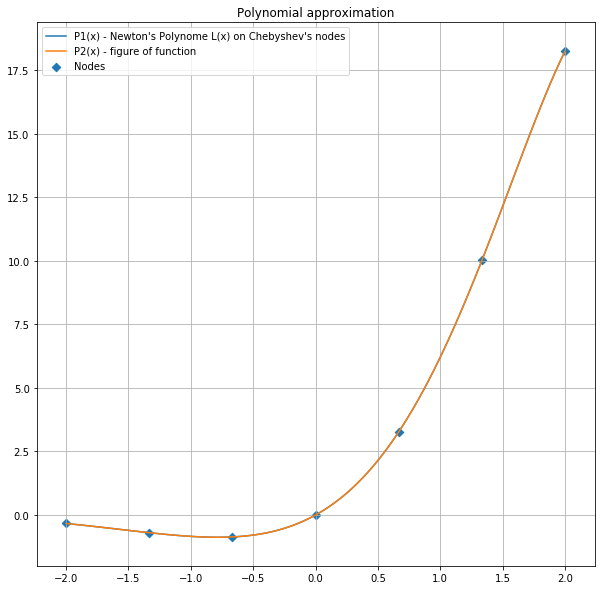

In [52]:
X  = np.linspace(points[0],points[n_Newton - 1],100)
plt.figure(figsize = (10,10))
plt.plot(X, f_x(X), 
         label = "P1(x) - Newton's Polynome L(x) on Chebyshev's nodes")
plt.plot(X,f_x(X), label = "P2(x) - figure of function")
plt.scatter(tn, f_x(tn), marker='D', label = "Nodes")  
#plt.scatter(points, f_x(points), marker='D', label = "Points")
plt.legend()
plt.grid()
plt.title("Polynomial approximation")
plt.show()


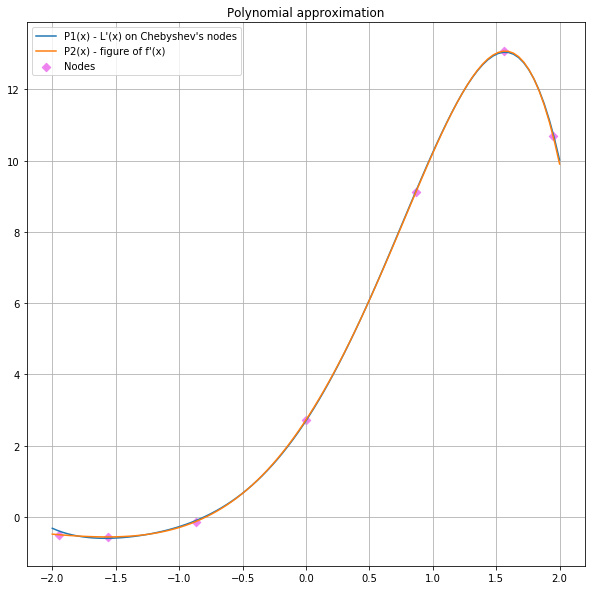

In [45]:
plt.figure(figsize = (10,10))
plt.plot(X, new_deriv_polynom(tn, f_x(tn), X), 
         label = "P1(x) - L'(x) on Chebyshev's nodes")
plt.plot(X,df_x(X), label = "P2(x) - figure of f'(x)")
plt.scatter(tn, df_x(tn), marker='D', color = 'violet', label = "Nodes")     
#plt.scatter(points, df_x(points), marker='D', label = "Points")
plt.legend()
plt.grid()
plt.title("Polynomial approximation")
plt.show()